# Project Background

In fall 2020 the film, The Social Dilemma, released on Netflix to millions of viewers around the globe. This powerful documentary explores how social media has damaged society by manipulating and addicting users and fueling the spread of misinformation. The rise of social media has caused profound changes to our mental health and has lead many to question where we go from here. Such an eye opening film has caught the attention of researchers who are interested in analyzing the reaction of the film's audience. Film producers are also interested in audience reaction as it will be used to position any follow up work to future audiences. Using a dataset that extracted thousands of tweets in response to the #TheSocialDilemma hashtag, the goal is to identify any interesting semantic structure in the tweets and create a model for predicting audience sentiment. 


Dataset Source: https://www.kaggle.com/kaushiksuresh147/the-social-dilemma-tweets

## Objectives



*   Perform exploratory data analysis
*   Create a Topic Model and analyze results
*   Build a model that captures audience sentiment
*   Issue Conclusions


## Dataset Description

The dataset was extracted using TwitterAPI, and consits of 10,526 Tweets from around the globe (14 columns, 20,067 rows). 







### Input Variables

**User Name** - The name of the user, as they’ve defined it.

**User Location** - The user-defined location for this account’s profile.

**User Description** - The user-defined UTF-8 string describing their account

**User Created** - Time and date, when the account was created.

**User Followers** - The number of followers an account currently has.

**User Friends** - The number of friends an account currently has.

**User Favorites** - The number of favorites a account currently has 

**User Verified** - When true, indicates that the user has a verified account

**Date** - UTC time and date when the Tweet was created

**Text** - The actual UTF-8 text of the Tweet

**Hashtags** - All the other hashtags posted in the tweet along with #TheSocialDilemma

**Source** - 	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web

**Is Retweet** - Indicates whether this Tweet has been Retweeted by the authenticating user.








### Target Variable 

**Sentiment** - Indicates the sentiment of the tweet, consists of three categories: Positive, Neutral, and Negative





## Project Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
import nltk, time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
import collections, itertools
from nltk.probability import FreqDist
import unicodedata
import pandas_profiling
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [ ]:
# import using Google Colab
from google.colab import files
uploaded = files.upload()

In [2]:
social_d = pd.read_csv('TheSocialDilemma.csv')

In [3]:
social_d.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [3]:
# change from object to datetime
social_d['user_created']= social_d['user_created'].apply(pd.to_datetime)


## Exploratory Data Analysis of Dataset

In [ ]:
pip install -U dataprep

In [ ]:
# Overall Analysis of the dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing
create_report(social_d)

### Observations from Exploratory Data Analysis of Dataset


*   The top 3 countries that tweets are coming from are US, India, UK
*   All tweets are original, (no retweets)
*   User accounts have been created with a date range of July 2006 to October 2020, with roughly 3% created in Q3 2020
*   User followers range from 0 to 15624426
*   User friends range from 0 to 	288625
*   Only 3.54% of user accounts are verified
*   60.92% of the hashtags are 'TheSocialDilemma' 
*   47.40% of the tweets are classified as positive, 34.79% as neutral, and 17.80% as negative
*   Missing values found in User Location, User Description, and Hastags




## Text Pre-Processing

It is important to extract any underlying patterns in these tweets therefore,common stopwords must be removed for the analysis as they do not provide any additional insight. Words associated with the title of the film, platform its being viewed on, and website code must be removed as well. Then in order to gain further understanding the following steps for text pre-processing will be taken
  - Remove all punctuation
  - Convert all terms to lowercase
  - Perform stemming, remove suffixes, transform plurals to singulars, remove prefixes
  - Eliminate numbers and special characters such as @, !, and emoji's
  



In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = stopwords.words('english')

words_to_remove = ['https', 'co', 'watch', 'netflix', 'social' , 'dilemma', 'documentary', 'thesocialdilemma', 'socialdilemma', 'amp']
stop_words.extend(words_to_remove)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c52267a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\c52267a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Text Pre-Processing Fucntion that performs text pre-processing steps mentioned above
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'SmartStoplist.txt'

stop_words = stop_words

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [5]:
clean_tweets = social_d['text'].apply(preprocess)

In [6]:
social_d['clean_tweets'] = social_d['text'].apply(preprocess)

In [7]:
# dropping unnecessary columns

social_d.drop(columns = ['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet'], inplace = True)

## Exploratory Analysis of Tweets

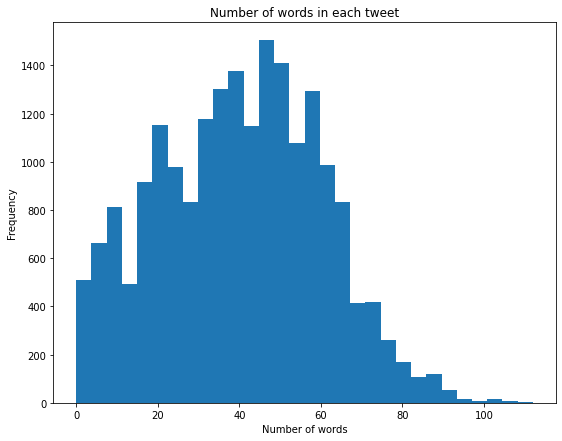

In [10]:
# Number of words in each tweet
clean_tweets.str.len().hist(grid=False, figsize=(9,7), bins=30)
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Number of words in each tweet')
plt.show()

In [13]:
# Most Common Words found in Tweets
from collections import Counter
Counter(" ".join(clean_tweets).split()).most_common(50)

[('watch', 4361),
 ('media', 2873),
 ('product', 1344),
 ('twitter', 906),
 ('time', 904),
 ('recommend', 869),
 ('peopl', 851),
 ('like', 838),
 ('facebook', 622),
 ('pay', 605),
 ('open', 547),
 ('thing', 535),
 ('phone', 527),
 ('eye', 509),
 ('tech', 508),
 ('good', 445),
 ('tweet', 443),
 ('thought', 440),
 ('delet', 436),
 ('technolog', 430),
 ('user', 420),
 ('highli', 415),
 ('kid', 412),
 ('news', 411),
 ('world', 388),
 ('call', 385),
 ('finish', 363),
 ('manipul', 362),
 ('interest', 361),
 ('scari', 359),
 ('import', 357),
 ('great', 356),
 ('ironi', 351),
 ('tristanharri', 351),
 ('industri', 349),
 ('make', 338),
 ('post', 336),
 ('ourpact', 336),
 ('addict', 334),
 ('movi', 331),
 ('drug', 324),
 ('matrix', 322),
 ('notif', 322),
 ('check', 322),
 ('onlin', 322),
 ('chang', 317),
 ('human', 304),
 ('mind', 303),
 ('turn', 302),
 ('algorithm', 292)]

In [12]:
fdist = FreqDist(clean_tweets)

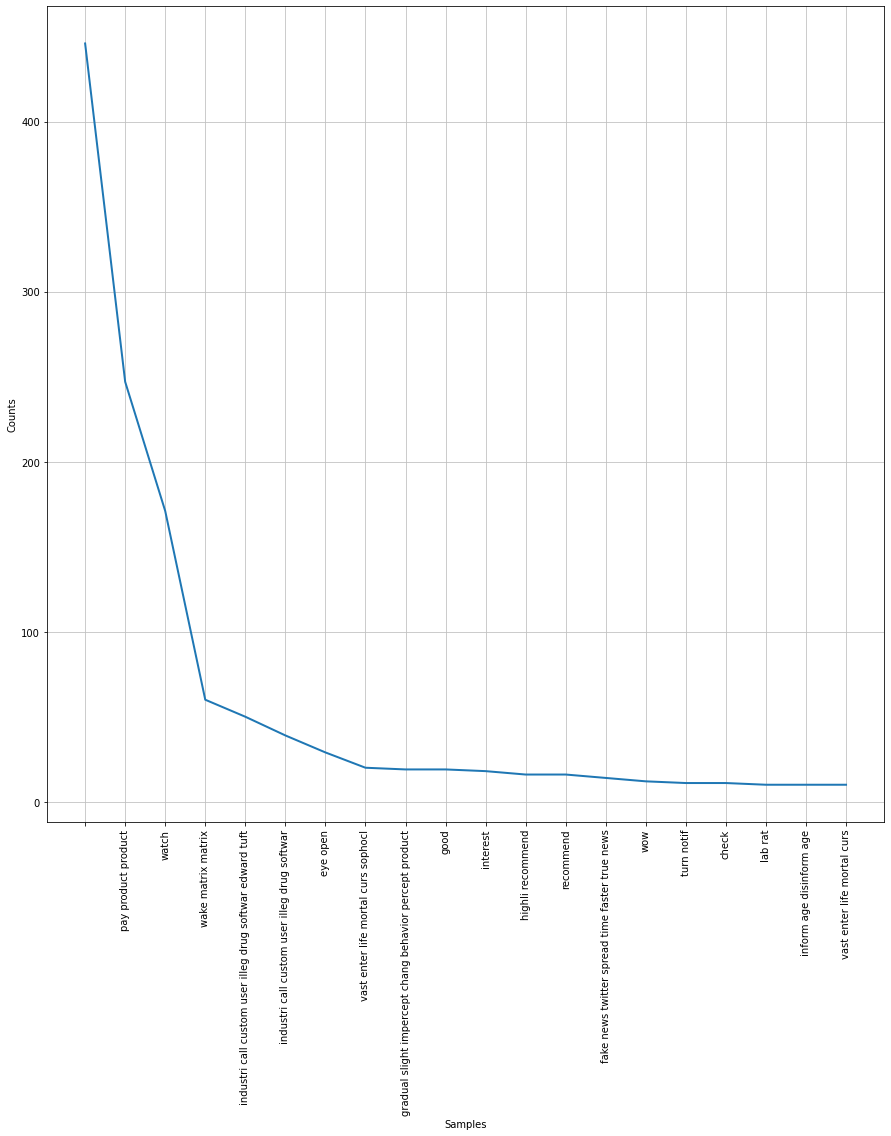

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
plt.figure(figsize=(15,15))
fdist.plot(20)

### Observations from Exploratory Analysis of Tweets

Tweets contain a range of about 1 to 110 words, which makes sense because the platform has a limit of 280 characters. The most common word in all tweets is 'watch' where it can be assumed that people are tweeting about watching the film. The word 'recommend' appears frequently, occurring 869 times. This could mean that many people are sharing their recommendations for the film to their followers. Another observation to note is that the phrase, 'pay product pay', appears many times in tweets. 

# Topic Model

The thousands of tweets found in this dataset are in response to the SocialDilemma hashtag, but what topics stand out and what is the optimal number? A topic model will be created to find hidden semantic structure in these tweets. The Pycaret package that will be used to conduct topic modeling, has a default setting of 4 topics using Latent Dirichlet Allocation, and thus will be used in the first model iteration.

In [14]:
# Setting up environment for Topic Modeling
from pycaret.nlp import *
import warnings
warnings.filterwarnings('ignore')

### Topic Model Fitting

In [15]:
social_dilemma = setup(data = social_d, target= 'text', custom_stopwords= stop_words, session_id= 123)

Description,Value
session_id,123
Documents,20068
Vocab Size,25685
Custom Stopwords,True


In [16]:
lda = create_model('lda')

#### Topic Model Evaluation

In [17]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

KeyboardInterrupt: 

By plotting the model with the tune_model() function of the Pycaret package it becomes evident that the optimal number of topics is 200, with a coherence score of .7303. This is the measure of the semantic similarity between high scoring words in the topic. For simplicity, the remainder of this analysis will focus on 32 topics, which had the second highest coherence score at .569.  A second iteration of the model will be built using this number.

In [18]:
# second model with 32 topics
lda2 = create_model('lda', num_topics= 32 )

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:56:54
Status,. . . . . . . . . . . . . . . . . .,Fitting Topic Model


KeyboardInterrupt: 

In [12]:
lda_results = assign_model(lda2)

#### Model and Corpus Analysis

The Pycaret package provides additional explorative capabilities of text data. Observations from package features will be noted at the end of the Topic Model analysis. 

In [ ]:
plot_model(plot = 'wordcloud')

In [13]:
plot_model(plot = 'frequency' )

In [14]:
plot_model( plot = 'bigram')

In [15]:
plot_model( plot = 'trigram')

In [16]:
plot_model(plot = 'distribution')

In [17]:
plot_model(lda2, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
plot_model(lda2, plot = 'tsne')

KeyboardInterrupt: 

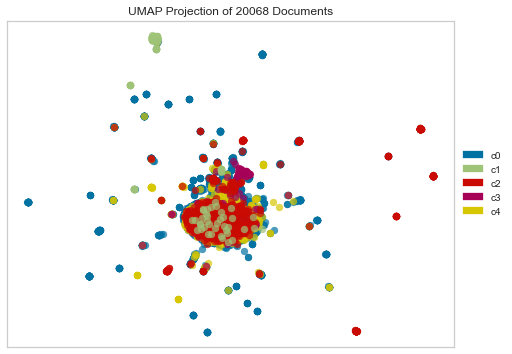

In [21]:
plot_model(lda2, plot = 'umap')

In [18]:
plot_model(lda2, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.202510  0.392820       1        1  14.126064
11     0.330667  0.158286       2        1   7.386767
19    -0.305562 -0.179171       3        1   6.833775
14    -0.312352  0.017995       4        1   5.671720
10    -0.230820  0.214406       5        1   5.490180
21     0.019280 -0.340741       6        1   5.480239
15    -0.146165 -0.284509       7        1   5.439764
29     0.325204 -0.004688       8        1   5.229074
4      0.114818  0.320761       9        1   3.788093
17     0.233520 -0.101112      10        1   3.411890
9      0.178857 -0.185136      11        1   3.358069
5     -0.204691  0.067794      12        1   3.187008
27    -0.211803 -0.111429      13        1   3.012075
8      0.089681  0.180739      14        1   2.937212
22     0.149975  0.112327      15        1   2.608161
3     -0.079557  0.154538      16        1   2.534355
26    -0.011473  0.177033      17        1   2.482640
7      0.091742 -0.187791      18        1   2.423565
13     0.130061  0.034337      19        1   2.314397
6     -0.075509 -0.112451      20        1   1.837019
24     0.009115 -0.162202      21        1   1.677072
12    -0.070658 -0.031389      22        1   1.341062
28    -0.002629  0.075315      23        1   1.333420
20    -0.077241  0.029010      24        1   1.324990
16     0.113728 -0.055778      25        1   1.178376
25     0.006872 -0.097673      26        1   1.159722
1      0.064200  0.009187      27        1   0.778537
31     0.035803 -0.051321      28        1   0.771021
18     0.002955 -0.010347      29        1   0.332324
2      0.011785 -0.008972      30        1   0.199500
23     0.011353 -0.009916      31        1   0.175954
30     0.011353 -0.009920      32        1   0.175954, topic_info=             Term        Freq        Total Category  logprob  loglift
24         medium  8504.00000  8504.000000  Default  30.0000  30.0000
126       twitter  2587.00000  2587.000000  Default  29.0000  29.0000
221       product  1742.00000  1742.000000  Default  28.0000  28.0000
23           time  1870.00000  1870.000000  Default  27.0000  27.0000
147        people  1832.00000  1832.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
17134   qhyicscuz     0.00678     1.552098  Topic32 -10.1537   0.9094
17135  ravishndtv     0.00678     1.552098  Topic32 -10.1537   0.9094
17156      sutczk     0.00678     1.552098  Topic32 -10.1537   0.9094
17155    orrfhxac     0.00678     1.552098  Topic32 -10.1537   0.9094
0               _     0.00678   317.647502  Topic32 -10.1537  -4.4120

[1015 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0        26  0.994813          _
293      11  0.980231        abt
185      25  0.792998   accurate
64        6  0.977132     action
42        1  0.977137  addictive
...     ...       ...        ...
383      14  0.988759       word
91        2  0.998097       work
63       11  0.998170      world
263       4  0.997375      worth
143      27  0.985335      write

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 12, 20, 15, 11, 22, 16, 30, 5, 18, 10, 6, 28, 9, 23, 4, 27, 8, 14, 7, 25, 13, 29, 21, 17, 26, 2, 32, 19, 3, 24, 31])

#### View of LDA Model Assingment

In [20]:
lda_results.head()

,text,Sentiment,clean_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,...,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29,Topic_30,Topic_31,Dominant_Topic,Perc_Dominant_Topic
0,musicmadmarc _ facebook remind poignant french...,Neutral,musicmadmarc facebook remind poignant quot fre...,0.077401,0.003977,0.001425,0.013387,0.018669,0.016562,0.009536,...,0.008684,0.312916,0.012925,0.169370,0.006967,0.028438,0.001337,0.004027,Topic 25,0.31
1,musicmadmarc _ facebook marc agree whicheve ns...,Neutral,musicmadmarc facebook haa hey marc agre whiche...,0.077401,0.157435,0.001425,0.013387,0.018669,0.016562,0.009536,...,0.008684,0.159457,0.012925,0.169370,0.006967,0.028438,0.001337,0.004027,Topic 27,0.17
2,minute spend bet gswcxetg,Positive,minut spend bet gswcx tg,0.091432,0.004698,0.001684,0.015814,0.022054,0.019565,0.011264,...,0.010258,0.007086,0.015268,0.018795,0.008230,0.033593,0.001579,0.367312,Topic 31,0.37
3,night scared humanity log luobcjcjfb,Negative,watch night scare human log luobcjcjfb,0.077401,0.003977,0.001425,0.013387,0.018669,0.016563,0.009536,...,0.008684,0.005999,0.012925,0.015911,0.467343,0.028438,0.001337,0.004027,Topic 28,0.47
4,problem phone time,Positive,problem phone time,0.077401,0.003977,0.001425,0.013387,0.018669,0.016562,0.009536,...,0.008684,0.005999,0.012925,0.015911,0.006967,0.028437,0.001337,0.004027,Topic 15,0.49


## Topic Model Analysis

The plotting function of the Pycaret package reveals frequent co-occurence of words contained in the tweets. For example, top 3 bigrams include 'pay, product', 'product product', and 'delete medium'. The top 3 trigrams include 'pay product product', 'delete medium account', and 'gradual slight interception change behavior perception product'. 'Delete Medium Account' potentially reveals a desired reaction from the audience after viewing the film. Of the 32 topics, topic 0 had by far the greatest distribution, appearing in 9209 documents. With the aid of an outside tool, WordStat, each of the 32 topics were given a classification name. It is important to note that the order of these topics does not correspond to the order present in the above graphics, with the exception of Topic 0.

1. Social Media
2. The Social Dilemma on Netflix Viewing
3. After Watching
4. Illegal Drugs Customers
5. Keeping Kids Safe
6. Paying for the Product
7. Fake News Times Faster
8. Eye Opening
9. Highly Recommend
10. Imperceptible Change that is the Product
11. Enters the Life of Mortals
12. Wake Up from the Matrix
13. Deleted Facebook Instagram
14. Tech Companies Big
15. Turn Off Notifications
16. Mind Blowing
17. Bring out the Worst Ability
18. Thought Provoking
19. Existential Threat
20. False Information
21. Live in A World Tree is Worth
22. Holy Shit
23. Business Model
24. Black Mirror
25. Lab Rats
26. Tristian Harris Design Ethicist
27. Silicon Valley
28. Impact of Social Human Impact of Social Networking
29. Mental Health
30. Civil War
31. Sold to Advertisers Attention is the Product
32. Mad Men

Interesting to note is that there are at least 6 topics with strong emotional language. Also, there are 3 topics where the audience felt that what is presented in the film is considered to be a threat to society. There are a few topics (deleted Facebook Instagram, Turn off Notifications) that present call to action in audience behavior. 

There is a drawback to using topic coherence as a means to choose the correct number of topics is that Coherence scores do not always indicate the best representation of distributional information. [https://www.aclweb.org/anthology/D12-1087.pdf]

# Sentiment Analysis

Researchers and producers are interested in the mood and subjective opinions that viewing this film elicits from the audience. Each tweet in the dataset is classified as either positive, negative, or neutral. Things to consider are the words that are associated with different moods and uncovering a way of predicting different sentiment and conduct opinion mining in the future.


#### Sentiment Distribution

- 47.4% of the Tweets are Positive
- 34.79% are Neutral
- 17.80% are Negative


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(social_d, x="Sentiment")
fig.update_traces(marker_color="green",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment Breakdown')
fig.show()

In [9]:
# Create three dataframes that seperate positive, neutral, and negative

positive = social_d[social_d['Sentiment'] == 'Positive']

neutral = social_d[social_d['Sentiment'] == 'Neutral']

negative = social_d[social_d['Sentiment'] == 'Negative']

#### Most Common Words

In [32]:
# Most Common Words from the positive dataset
Counter(" ".join(positive["clean_tweets"]).split()).most_common(20)

[('media', 2213),
 ('watch', 2099),
 ('recommend', 591),
 ('peopl', 456),
 ('time', 440),
 ('good', 411),
 ('like', 387),
 ('highli', 362),
 ('twitter', 353),
 ('great', 351),
 ('ourpact', 333),
 ('import', 332),
 ('kid', 328),
 ('product', 324),
 ('thing', 321),
 ('interest', 319),
 ('open', 310),
 ('eye', 289),
 ('onlin', 266),
 ('thought', 264)]

In [33]:
# Most Common Words from the Neutral dataset
Counter(" ".join(neutral["clean_tweets"]).split()).most_common(20)

[('watch', 1506),
 ('product', 935),
 ('pay', 460),
 ('twitter', 315),
 ('matrix', 273),
 ('like', 270),
 ('facebook', 256),
 ('peopl', 210),
 ('time', 207),
 ('phone', 197),
 ('recommend', 169),
 ('wake', 168),
 ('tweet', 163),
 ('technolog', 151),
 ('tech', 148),
 ('open', 145),
 ('tristanharri', 143),
 ('notif', 137),
 ('delet', 135),
 ('check', 131)]

In [34]:
# Most Common Words from the Negative dataset
Counter(" ".join(negative["clean_tweets"]).split()).most_common(20)

[('watch', 756),
 ('media', 604),
 ('news', 286),
 ('scari', 284),
 ('user', 262),
 ('time', 257),
 ('drug', 243),
 ('twitter', 238),
 ('industri', 238),
 ('illeg', 235),
 ('custom', 232),
 ('softwar', 225),
 ('call', 223),
 ('peopl', 185),
 ('fake', 182),
 ('like', 181),
 ('fuck', 145),
 ('terrifi', 136),
 ('addict', 134),
 ('facebook', 132)]

### Bigrams and Trigrams

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(positive['clean_tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
positive_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [36]:
positive_ngram.head(20)

,frequency,bigram
0,313,highli recommend
1,249,eye open
2,227,kid safe
3,212,ourpact kid
4,211,safe onlin
5,181,onlin million
6,160,million famili
7,120,famili ourpact
8,92,delet media
9,86,product product


In [48]:
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,5))
# matrix of ngrams
ngrams = c_vec.fit_transform(positive['clean_tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
positive_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

In [50]:
positive_trigram.head(20)

,frequency,trigram
0,313,highli recommend
1,249,eye open
2,227,kid safe
3,212,ourpact kid
4,211,safe onlin
5,211,ourpact kid safe
6,211,kid safe onlin
7,209,ourpact kid safe onlin
8,181,safe onlin million
9,181,ourpact kid safe onlin million


In [30]:
top_positive_bigrams = positive_ngram[:20]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,4))
# matrix of ngrams
ngrams = c_vec.fit_transform(neutral['clean_tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
neutral_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [47]:
neutral_ngram.head(50)

,frequency,bigram/trigram
0,439,pay product
1,422,product product
2,415,pay product product
3,140,wake matrix
4,113,matrix matrix
5,110,wake matrix matrix
6,108,eye open
7,77,turn notif
8,55,mortal curs
9,54,vast enter


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(negative['clean_tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
negative_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [56]:
negative_ngram.head(50)

,frequency,bigram/trigram
0,233,illeg drug
1,229,user illeg
2,227,user illeg drug
3,227,custom user
4,223,custom user illeg
5,216,illeg drug softwar
6,216,drug softwar
7,193,call custom
8,192,call custom user
9,188,industri call


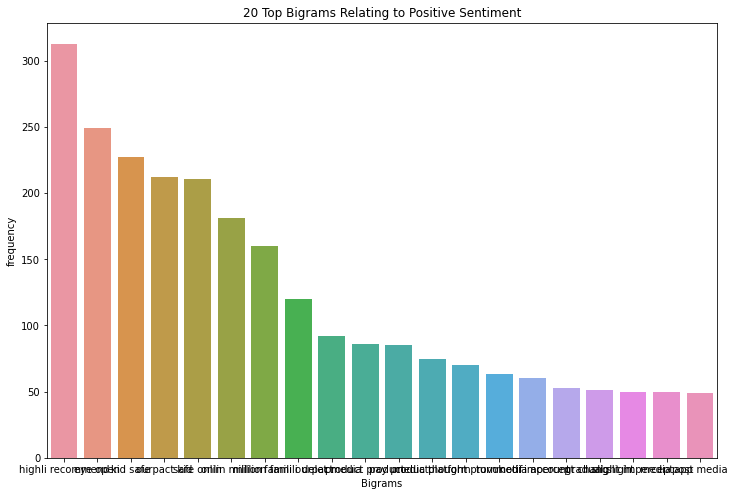

In [31]:
fig = plt.figure(figsize=(12,8))
fig = sns.barplot(x=top_positive_bigrams['bigram'], y=top_positive_bigrams['frequency'])
fig = plt.xlabel("Bigrams")
fig = plt.ylabel('frequency')
fig = plt.title('20 Top Bigrams Relating to Positive Sentiment')
plt.show()

In [23]:
)

TypeError: no numeric data to plot

In [10]:
# drop the text column and only used the clean_tweets as the independent variable
social_d.drop(columns = ['text'], inplace = True)

In [11]:
# Assign a 1 to Negative Tweets and 0 to Positive Tweets
dct = {'Positive':0, 'Negative' : 1, 'Neutral': 2}

social_d['Sentiment'] = social_d['Sentiment'].apply(lambda x: dct[x])

In [20]:
social_d.head()

,text,Sentiment,clean_tweets
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral,musicmadmarc facebook remind poignant quot fre...
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral,musicmadmarc facebook haa hey marc agre whiche...
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive,minut spend bet gswcx tg
3,I watched #TheSocialDilemma last night. I’m sc...,Negative,watch night scare human log luobcjcjfb
4,The problem of me being on my phone most the t...,Positive,problem phone time


In [31]:
# Create Bag of Words

#from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')

#social_d['clean_tweets'] = vectorizer.fit_transform(social_d['clean_tweets'])

In [13]:
# Import Pycaret for Classification 

from pycaret import classification

In [14]:
classification_setup = classification.setup(data = social_d, target = 'Sentiment')

,Description,Value
0,session_id,2415
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(20068, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
classification_rf = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5317,0.5544,0.3985,0.7234,0.4270,0.1291,0.2378
1,0.5423,0.5661,0.4149,0.7123,0.4483,0.1538,0.2610
2,0.5210,0.5441,0.3890,0.6794,0.4122,0.1097,0.2077
3,0.5480,0.5661,0.4191,0.7334,0.4556,0.1649,0.2801
4,0.5181,0.5441,0.3876,0.6645,0.4131,0.1060,0.1898
5,0.5324,0.5527,0.3986,0.7287,0.4287,0.1313,0.2401
6,0.5189,0.5437,0.3826,0.7091,0.4051,0.1030,0.2019
7,0.5377,0.5602,0.4090,0.7115,0.4410,0.1444,0.2504
8,0.5413,0.5612,0.4094,0.7304,0.4421,0.1495,0.2663
9,0.5285,0.5533,0.3988,0.6915,0.4270,0.1258,0.2233


In [ ]:
classification.evaluate_model(classification_rf)

In [ ]:
classification.compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:22:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4844,0.5597,0.3900,0.6859,0.3781,0.1061,0.2062,235.6380
lr,Logistic Regression,0.4273,0.4633,0.3194,0.5802,0.3443,0.1050,0.1915,32.1500
nb,Naive Bayes,0.2120,0.5202,0.3631,0.7656,0.1218,0.0323,0.1176,3.3650
